## 1.To take a look at the big picture  

our model should learn from classic dataset contains the prices and other attributes of almost 54,000 diamonds ,and be able to predict the diamond price .
Features :

price : price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut :quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color :diamond color, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x :length in mm (0--10.74)

y :width in mm (0--58.9)

z :depth in mm (0--31.8)

depth :total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table :width of top of diamond relative to widest point (43--95)


## 2.Get the data

In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('diamonds.csv')
dimsdf = df.copy()
dims2 = dimsdf.copy()

In [43]:
dimsdf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [228]:
dimsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [229]:
dimsdf.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223DD5D9BC8>,
      dtype=object)

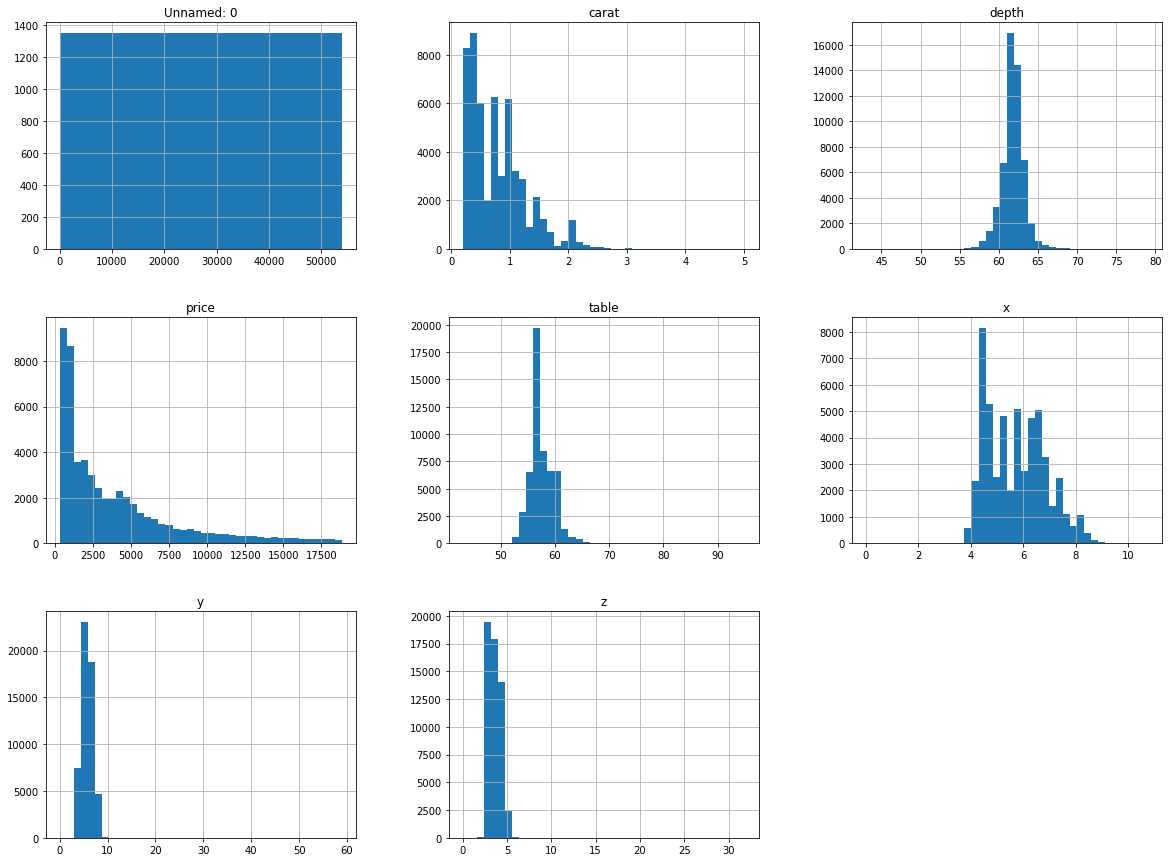

In [59]:
dimsdf.hist(bins=40,figsize=(20,15))

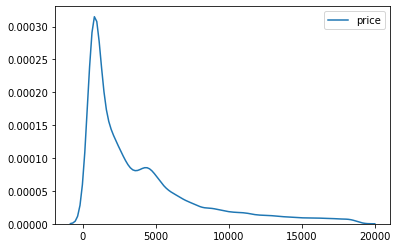

In [60]:
sns.kdeplot(dimsdf['price']) #skwed to the right 

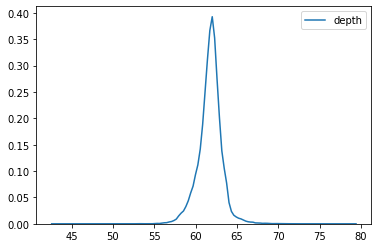

In [62]:
sns.kdeplot(dimsdf['depth'])#bell-shaped 

## 3.Discover and visulize the data to get insight 

### Looking for correlations

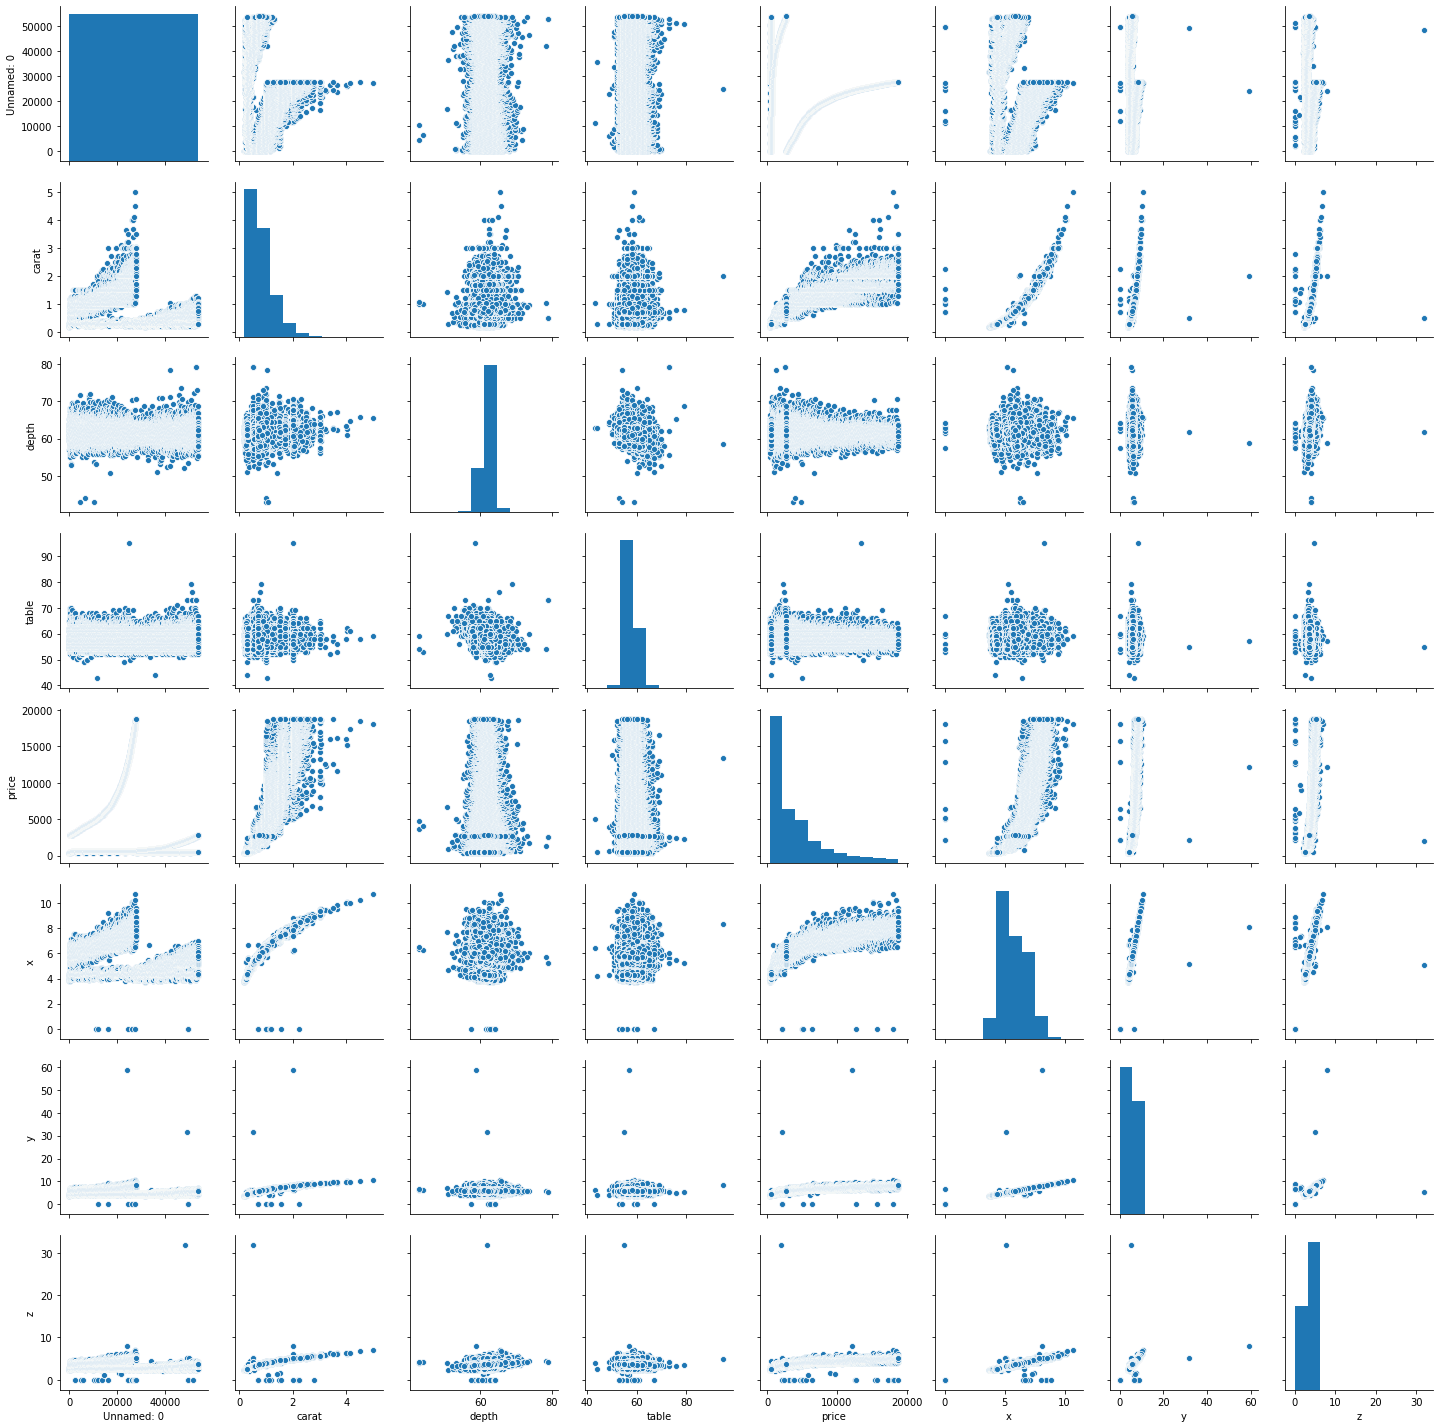

In [30]:
sns.pairplot(dimsdf)

In [11]:
dimsdf.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [66]:
#correlation = dimsdf.corr()
#correlation['carat'].sort_values(ascending = False)
# OR 

In [204]:
#dimsdf.corr()['carat'].sort_values(ascending=False)

In [74]:
dimsdf.corr()['depth'].sort_values(ascending=False)

depth         1.000000
z             0.094924
carat         0.028224
price        -0.010647
x            -0.025289
y            -0.029341
Unnamed: 0   -0.034800
table        -0.295779
Name: depth, dtype: float64

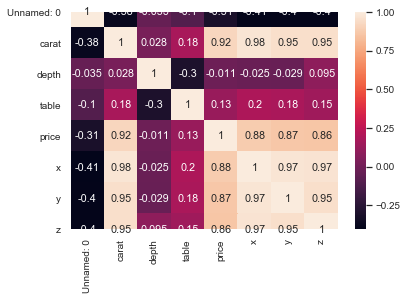

In [75]:

sns.heatmap(dimsdf.corr(), annot=True)


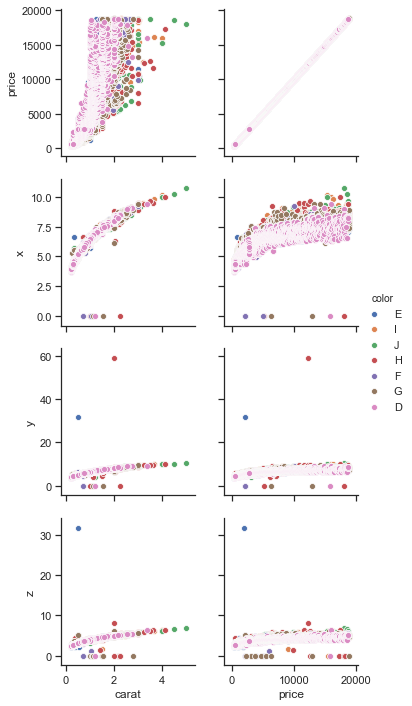

In [80]:
sns.pairplot(dimsdf,hue='color',x_vars=['carat','price'],y_vars=['price','x','y','z'])

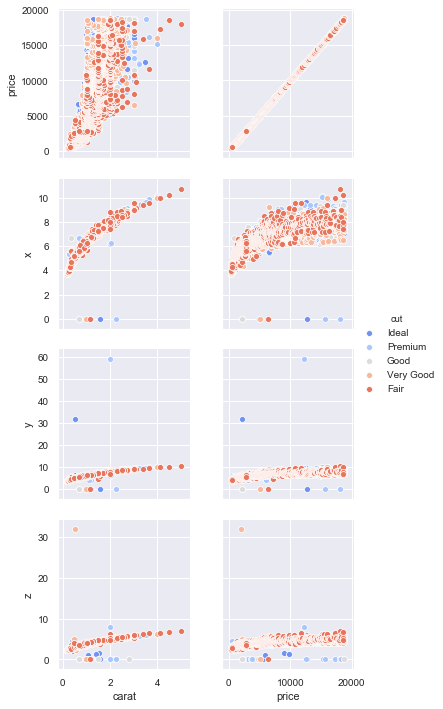

In [80]:
sns.pairplot(dimsdf,hue='cut',x_vars=['carat','price'],
             y_vars=['price','x','y','z'],
             palette='coolwarm')

In [205]:
#sns.pairplot(dimsdf,hue='clarity',x_vars=['carat','price'],y_vars=['price','x','y','z'])

In [13]:
#dimsdf.plot(kind="scatter",x='price',y='z',alpha=0.5) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


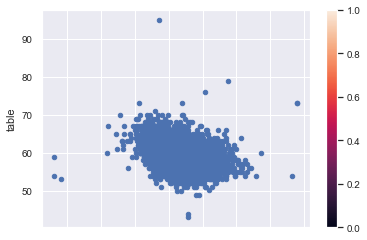

In [207]:
dimsdf.plot.scatter(x='depth',y='table',cmap='coolwarm')

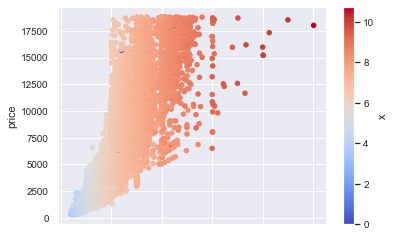

In [65]:
dimsdf.plot.scatter(x='carat',y='price',c='x',cmap='coolwarm')

### Categorical attributes visulization

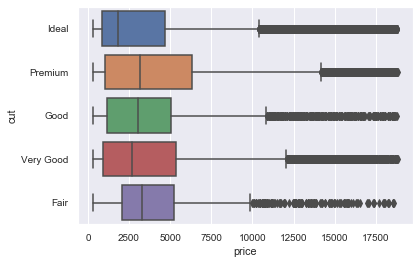

In [57]:
sns.boxplot(x='price',y='cut',data=dimsdf)

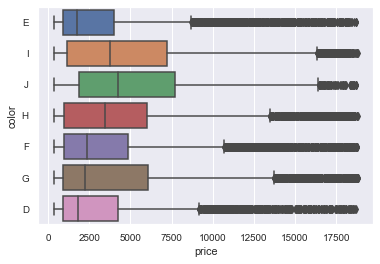

In [64]:
sns.boxplot(x='price',y='color',data=dimsdf)

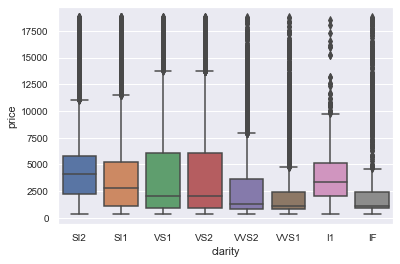

In [53]:
sns.boxplot(x='clarity',y='price',data=dimsdf)
#It seems that VS1 and VS2 affect the Diamond's Price equally 

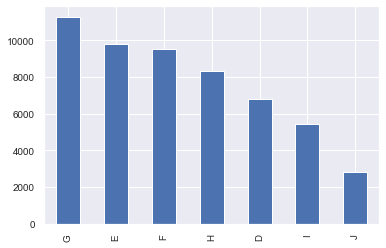

In [62]:
dimsdf['color'].value_counts().plot(kind="bar")

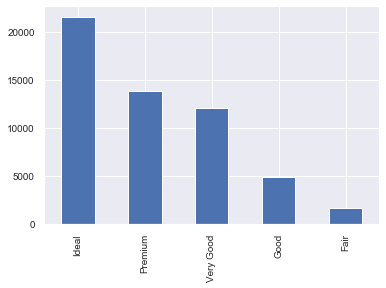

In [63]:
dimsdf['cut'].value_counts().plot(kind="bar")

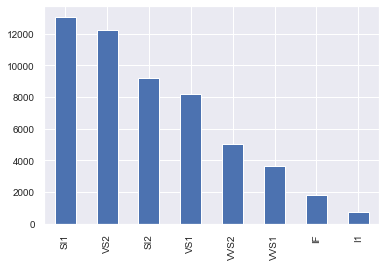

In [139]:
dimsdf['clarity'].value_counts().plot(kind="bar")

## 4.Prepare data for machine learning algorithms

### Aggregation column and drop 'Unnamed: 0' col

In [50]:
dimsdf['diamond_size'] = dimsdf['x']*dimsdf['y']*dimsdf['z']
dimsdf.drop(['Unnamed: 0','x','y','z'] , axis=1,inplace=True)

In [4]:
dimsdf.head()

,carat,cut,color,clarity,depth,table,price,diamond_size
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### convert categorical attributes into numerical (custom Encoder )

In [51]:
def color_switch(arg):
    if arg == 'D':
         return 1
    elif arg == 'E':
         return 2
    elif arg == 'F':
         return 3
    elif arg == 'G':
         return 4
    elif arg == 'H':
        return 5
    elif arg == 'I':
        return 6
    elif arg == 'J':
        return 7
    else:
        return None


In [52]:
def clarity_switch(arg):
    if arg == 'IF':
         return 1
    elif arg == 'VVS1':
         return 2
    elif arg == 'VVS2':
         return 3
    elif arg == 'VS1':
         return 4
    elif arg == 'VS2':
        return 5
    elif arg == 'SI1':
        return 6
    elif arg == 'SI2':
        return 7
    elif arg == 'I1':
        return 8
    else:
        return None

In [53]:
def cut_switch(arg):
    if arg == 'Ideal':
         return 1
    elif arg == 'Premium':
         return 2
    elif arg == 'Very Good':
         return 3
    elif arg == 'Good':
         return 4
    elif arg == 'Fair':
        return 5
    else:
        return None

In [54]:
dimsdf['cut'] = dimsdf['cut'].apply(cut_switch)

In [55]:
dimsdf['clarity'] = dimsdf['clarity'].apply(clarity_switch)

In [56]:
dimsdf['color'] = dimsdf['color'].apply(color_switch)

In [57]:
dimsdf.head()

,carat,cut,color,clarity,depth,table,price,diamond_size
0,0.23,1,2,7,61.5,55.0,326,38.202030
1,0.21,2,2,6,59.8,61.0,326,34.505856
2,0.23,4,2,4,56.9,65.0,327,38.076885
3,0.29,2,6,5,62.4,58.0,334,46.724580
4,0.31,4,7,7,63.3,58.0,335,51.917250


### Split data into train , test set

In [12]:
dimsdf.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'diamond_size'],
      dtype='object')

In [58]:
x = dimsdf[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'diamond_size']]
y = dimsdf['price']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

## 5.Select and train a model 

### Train the model , prediction and model evaluation 

### Linear regression

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import math

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print("accuracy: "+ str(regr.score(x_train,y_train)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))


accuracy: 90.41954579340646%
Mean absolute error: 846.2162471606225
Mean squared error: 1467599.4266482103
Root Mean squared error: 1211.4451810330545


### Ridge regression 

In [64]:
rig_reg = linear_model.Ridge()
rig_reg.fit(x_train,y_train)
y_pred = rig_reg.predict(x_test)
print("accuracy: "+ str(rig_reg.score(x_train,y_train)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))


accuracy: 90.41952491267384%
Mean absolute error: 846.1332060503923
Mean squared error: 1467536.2971540245
Root Mean squared error: 1211.4191253047084


### Lasso regression

In [65]:
las_reg = linear_model.Lasso()
las_reg.fit(x_train,y_train)
y_pred = las_reg.predict(x_test)
print("accuracy: "+ str(las_reg.score(x_train,y_train)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))


accuracy: 90.41894404136909%
Mean absolute error: 845.6110770024648
Mean squared error: 1467220.2362550562
Root Mean squared error: 1211.2886675995348


### Random forest regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(x_train,y_train)
y_pred = random_reg.predict(x_test)
print("accuracy: "+ str(random_reg.score(x_train,y_train)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error: {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))


accuracy: 99.63122242579144%
Mean absolute error: 281.3117254915809
Mean squared error: 313143.4674313442
Root Mean squared error: 559.5922331763944


### Delete Outliers :

In [18]:
dims_out = dimsdf.copy()

In [20]:
dims_out.head()

,carat,cut,color,clarity,depth,table,price,diamond_size
0,0.23,1,2,7,61.5,55.0,326,38.202030
1,0.21,2,2,6,59.8,61.0,326,34.505856
2,0.23,4,2,4,56.9,65.0,327,38.076885
3,0.29,2,6,5,62.4,58.0,334,46.724580
4,0.31,4,7,7,63.3,58.0,335,51.917250


In [21]:
Q1=dims_out['price'].quantile(0.25)
Q3=dims_out['price'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
dims_out = dims_out[dims_out['price']< Upper_Whisker]

-5611.375 11885.625


In [22]:
dims_out.shape

(50400, 8)

In [23]:
Q1=dims_out['depth'].quantile(0.25)
Q3=dims_out['depth'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
dims_out = dims_out[dims_out['depth']< Upper_Whisker]

59.0 64.6


In [24]:
dims_out.shape

(49265, 8)

In [25]:
Q1=dims_out['carat'].quantile(0.25)
Q3=dims_out['carat'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
dims_out = dims_out[dims_out['carat']< Upper_Whisker]

-0.5650000000000001 1.955


In [26]:
dims_out.shape

(49050, 8)

In [27]:
Q1=dims_out['table'].quantile(0.25)
Q3=dims_out['table'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
dims_out = dims_out[dims_out['table']< Upper_Whisker]

51.5 63.5


In [28]:
dims_out.shape

(48532, 8)

In [29]:
Q1=dims_out['diamond_size'].quantile(0.25)
Q3=dims_out['diamond_size'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
dims_out = dims_out[dims_out['diamond_size']< Upper_Whisker]

-90.35856000000001 315.94185600000003


In [30]:
dims_out.shape

(48526, 8)

### split data


In [32]:
x2 = dims_out[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'diamond_size']]
y2 = dims_out['price']
from sklearn.model_selection import train_test_split
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x2,y2,test_size=0.2)

### Train model after drop outliers 

### Linear regression 

In [33]:
regr = linear_model.LinearRegression()
regr.fit(x_train2,y_train2)
y_pred = regr.predict(x_test2)
print("accuracy: "+ str(regr.score(x_train2,y_train2)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test2,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test2,y_pred)))

accuracy: 91.098053850383%
Mean absolute error: 601.0990161979611
Mean squared error: 670456.8818377546


### Ridge regression 

In [34]:
rig_reg = linear_model.Ridge()
rig_reg.fit(x_train2,y_train2)
y_pred = rig_reg.predict(x_test2)
print("accuracy: "+ str(rig_reg.score(x_train2,y_train2)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test2,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test2,y_pred)))


accuracy: 91.09757725764737%
Mean absolute error: 601.0224561680969
Mean squared error: 670346.3660868844


### Lasso regression

In [35]:
las_reg = linear_model.Lasso()
las_reg.fit(x_train2,y_train2)
y_pred = las_reg.predict(x_test2)
print("accuracy: "+ str(las_reg.score(x_train2,y_train2)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test2,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test2,y_pred)))


accuracy: 91.0734588468634%
Mean absolute error: 600.6439032730094
Mean squared error: 671051.2373610141


### Random forest regressor

In [36]:
random_reg = RandomForestRegressor()
random_reg.fit(x_train2,y_train2)
y_pred = random_reg.predict(x_test2)
print("accuracy: "+ str(random_reg.score(x_train2,y_train2)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test2,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test2,y_pred)))


accuracy: 99.65718698167258%
Mean absolute error: 216.69123766104423
Mean squared error: 139125.84056127275
